# Import and Setup

In [ ]:
import sys
import os
import pandas as pd
from eda import (
    analyze_data,
    preprocess_data,
    visualize_bar_charts,
    visualize_histograms,
    pairplot,
    barplot,
    plot_correlation_matrix
)

sys.path.append(os.path.abspath('../src'))

%matplotlib inline

# Load Raw Data

In [22]:
df_raw = pd.read_csv("../data/train.csv")
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Basic Analysis

In [23]:
analyze_data(df_raw)

DataFrame Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   N

# Preprocess Data

In [24]:
df_clean = preprocess_data(df_raw)
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_Missing,Embarked_Q,Embarked_S,Has_Cabin
0,0,3,0,22.0,1,0,7.2500,2,0,0,False,True,0
1,1,1,1,38.0,1,0,71.2833,2,0,0,False,False,1
2,1,3,1,26.0,0,0,7.9250,1,1,0,False,True,0
3,1,1,1,35.0,1,0,53.1000,2,0,0,False,True,1
4,0,3,0,35.0,0,0,8.0500,1,1,0,False,True,0


# Categorical Distributions

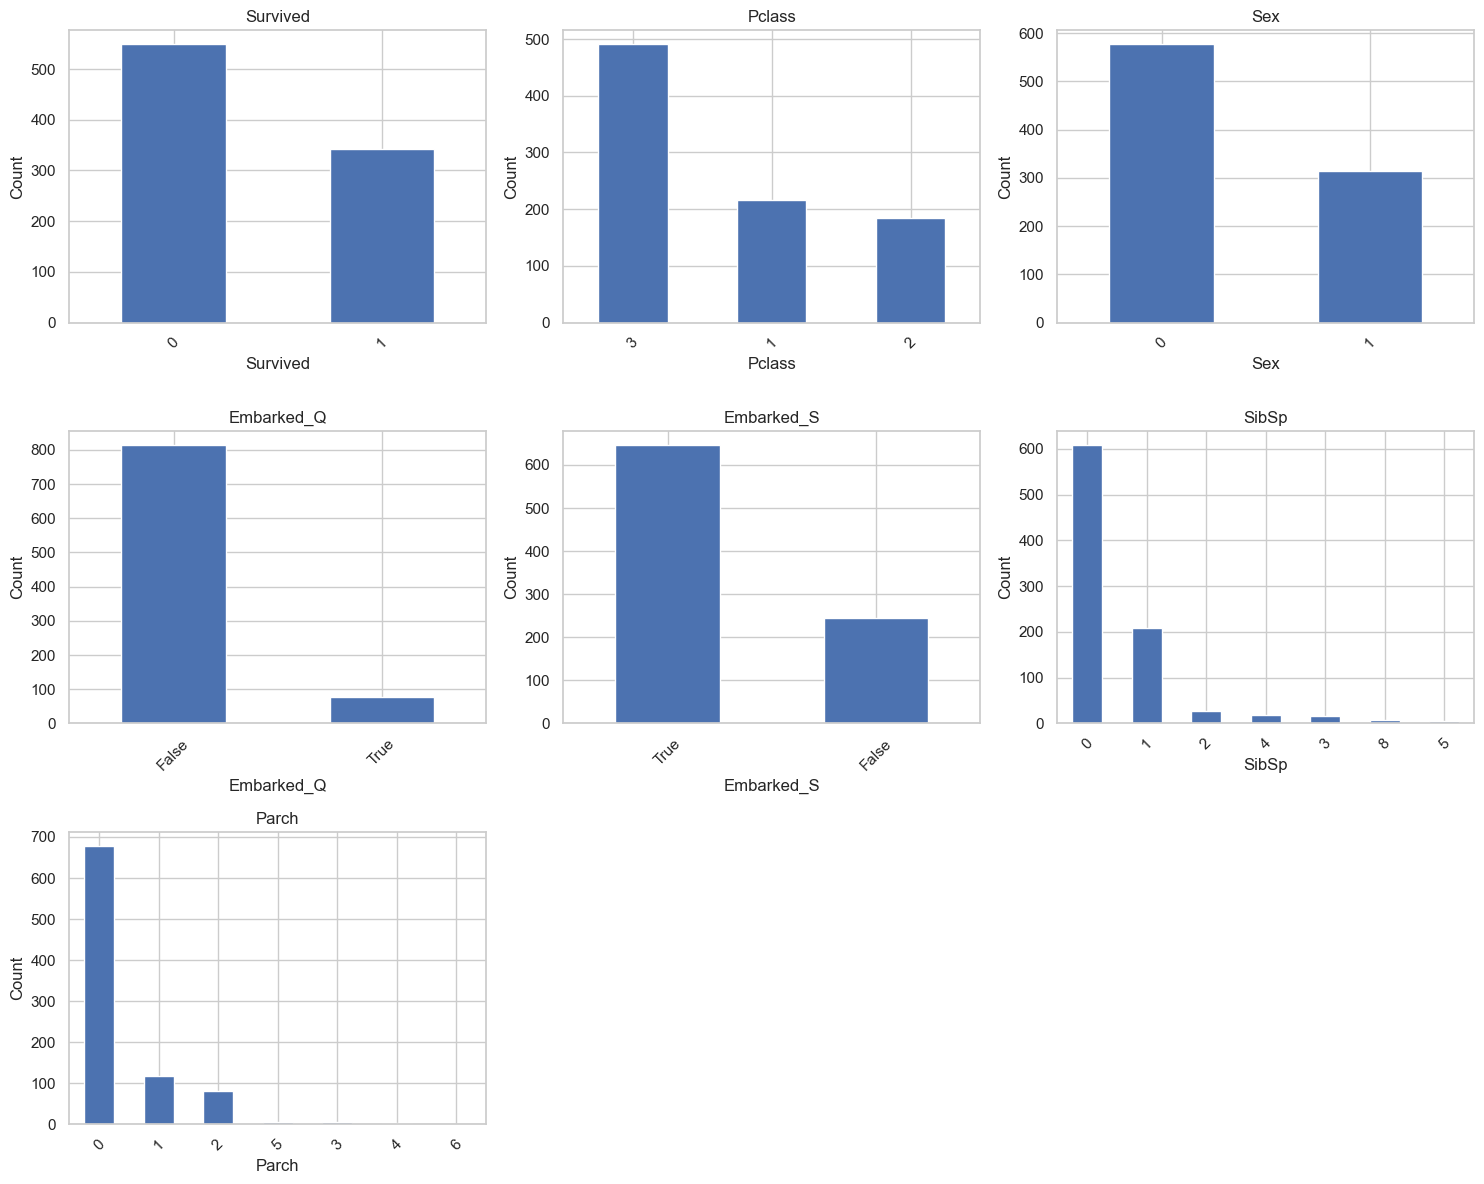

In [25]:
visualize_bar_charts(df_clean)

### Insights: Categorical Distributions

- **Sex**: A noticeably higher number of males compared to females were aboard.
- **Survived**: More people died than survived.
- **Pclass**: Most passengers were in 3rd class, which might correlate with lower survival.

# Numeric Distributions

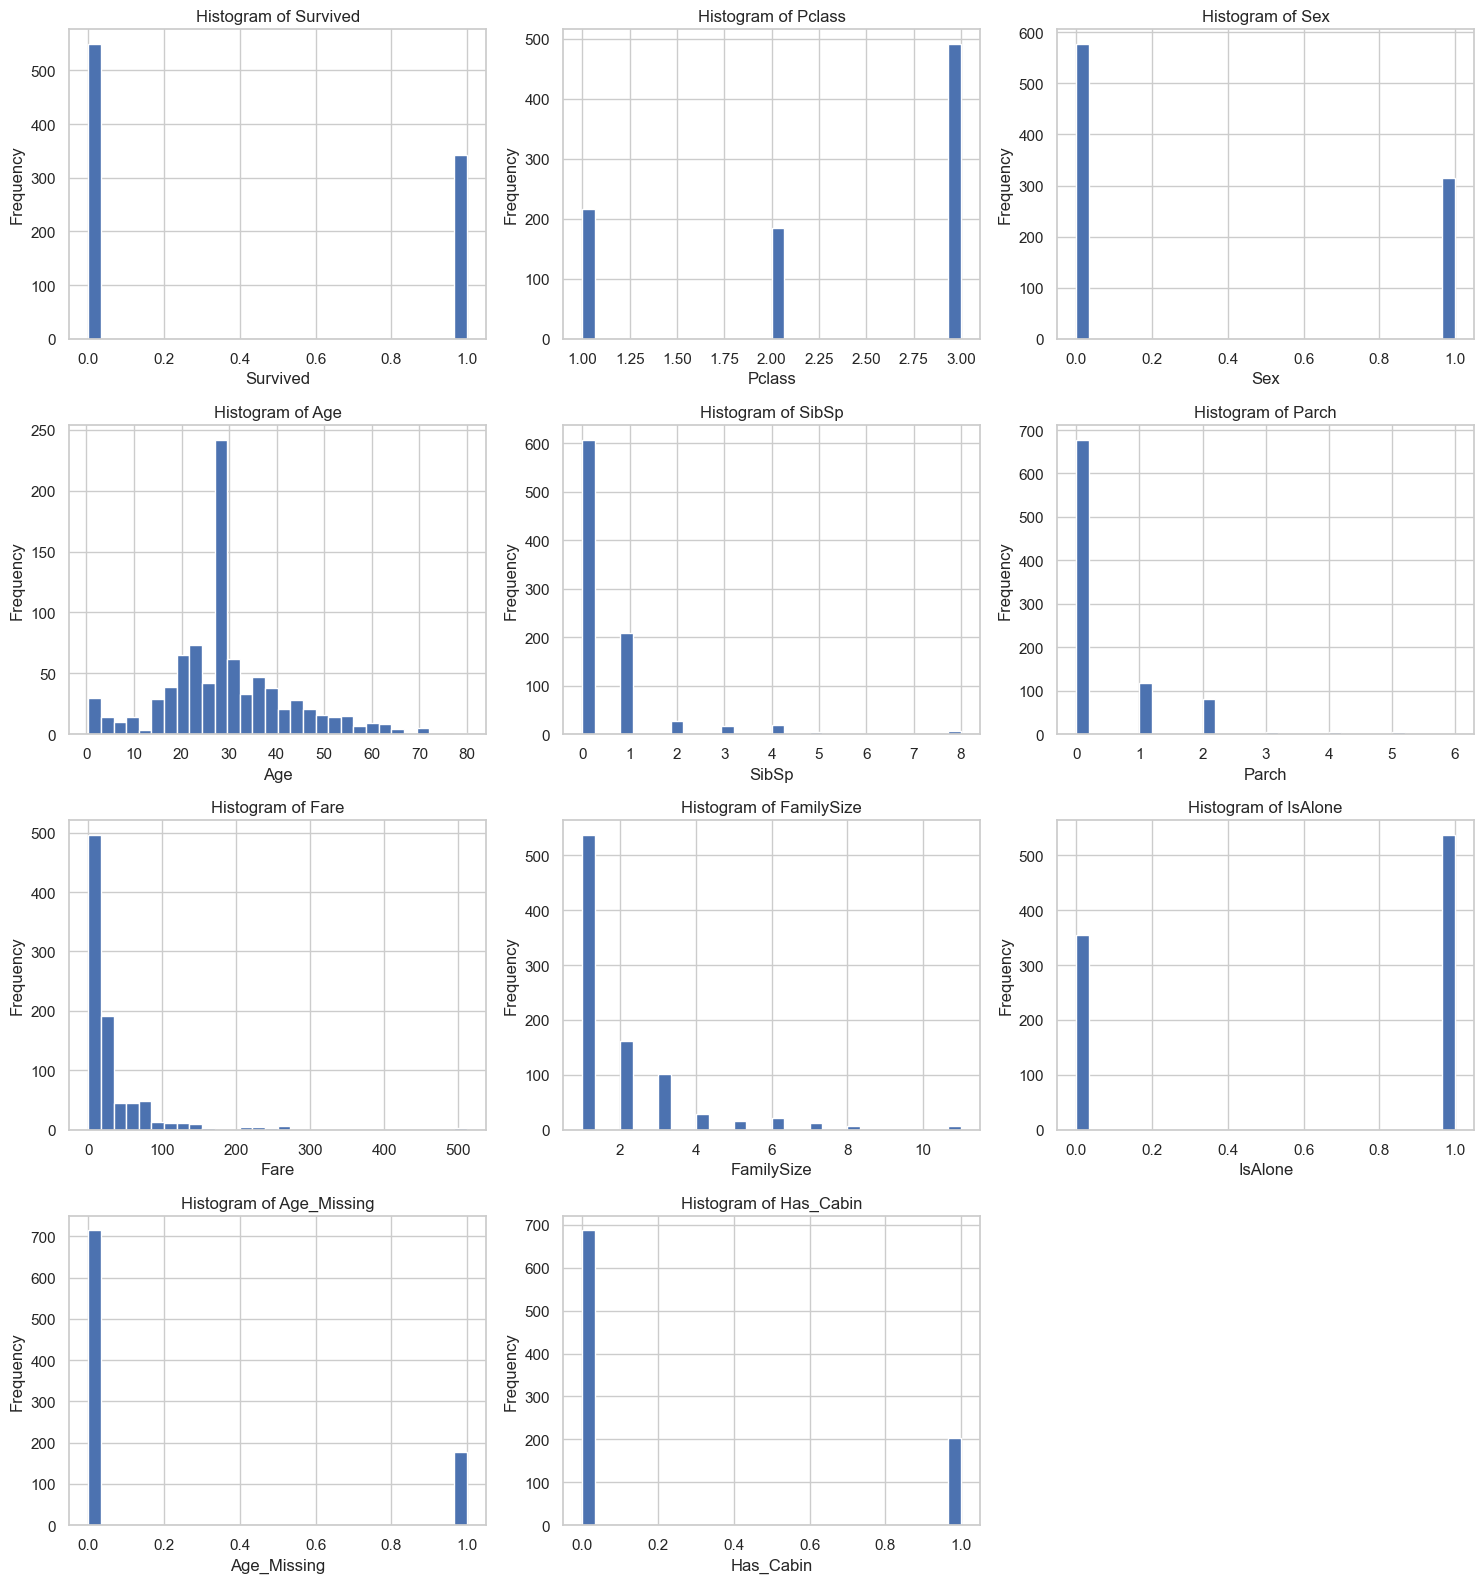

In [26]:
visualize_histograms(df_clean)

### Insight: Numerical Distributions

- **Fare**: Right-skewed; most fares are low, but a few outliers paid very high amounts.
- **Age**: Slight right skew; the median age is around 28-30, and children were also aboard.

# Pairwise Relationships

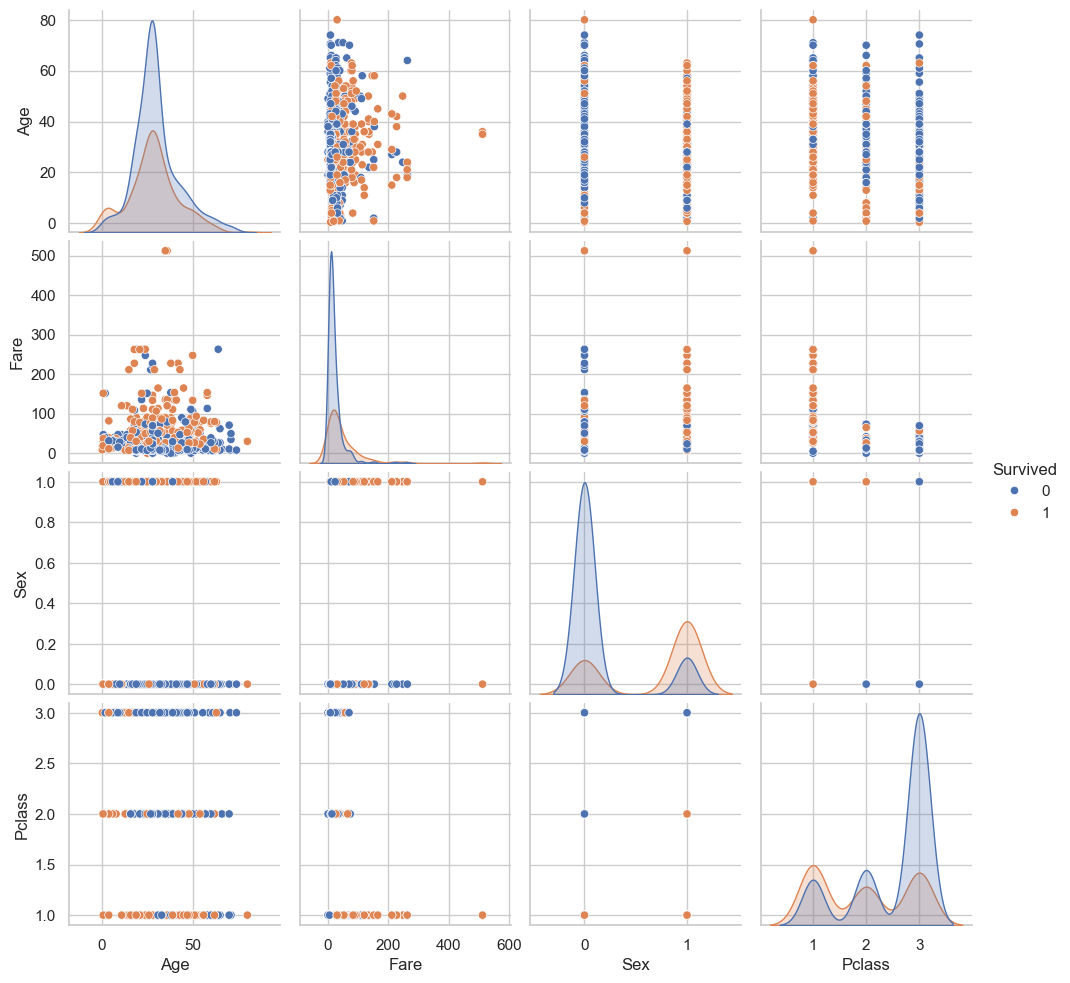

In [27]:
pairplot(df_clean)

### Insight: Pairwise Relationships

- Passengers who survived tend to be female, younger, and paid higher fares.
- 1st class passengers cluster toward higher survival rates.

# Class-Wise Barplot

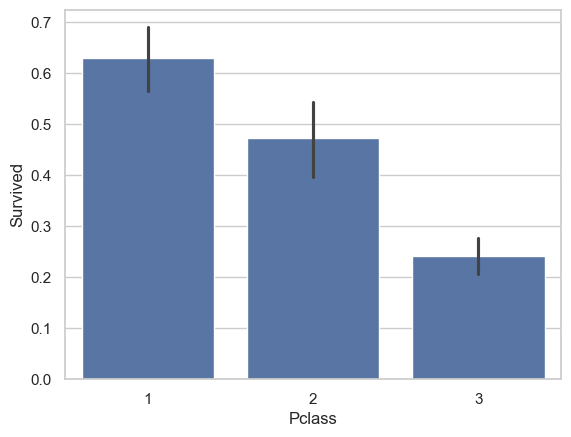

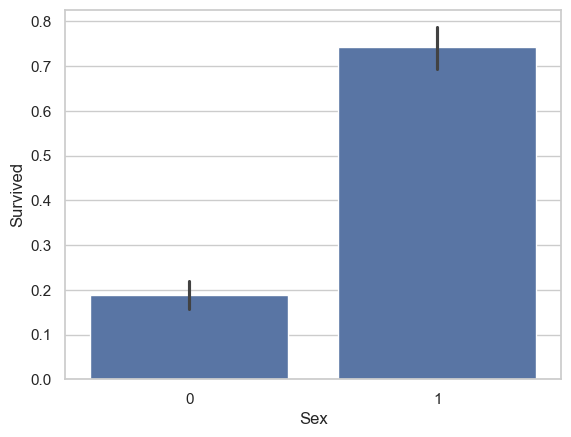

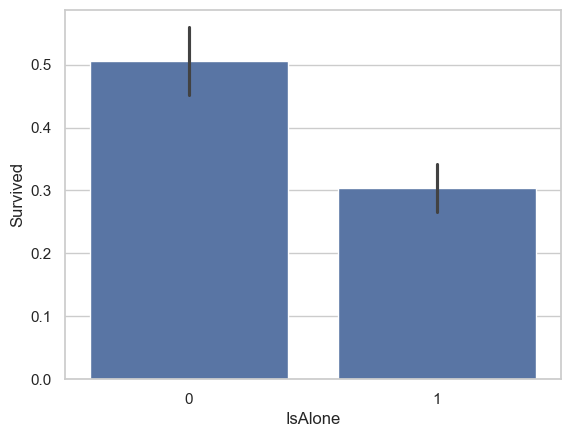

In [30]:
barplot(df_clean, x='Pclass', y='Survived')
barplot(df_clean, x='Sex', y='Survived')
barplot(df_clean, x='IsAlone', y='Survived')

# Correlation Heatmap

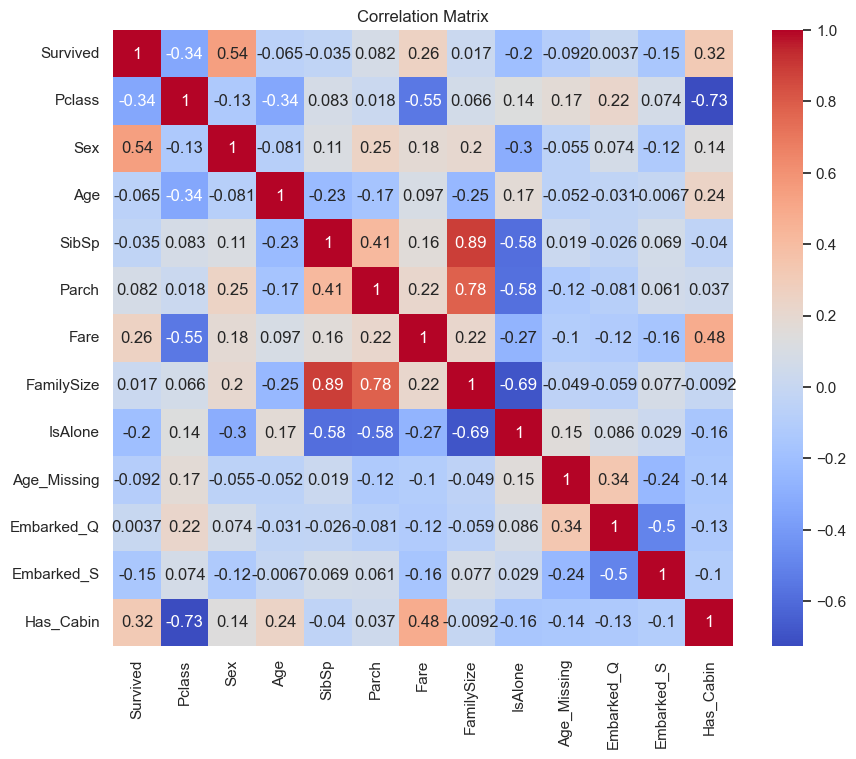

In [31]:
plot_correlation_matrix(df_clean)

In [32]:
df_clean.corr()['Survived'].sort_values(ascending=False)

Survived       1.000000
Sex            0.543351
Has_Cabin      0.316912
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
Embarked_Q     0.003650
SibSp         -0.035322
Age           -0.064910
Age_Missing   -0.092197
Embarked_S    -0.149683
IsAlone       -0.203367
Pclass        -0.338481
Name: Survived, dtype: float64

### Insight: Correlation Analysis

- **Sex** is strongly negatively correlated with survival (note: females are encoded as 1). Women had a much higher survival rate.
- **Fare** and **Pclass** show moderate correlation with survival. Wealthier passengers had better chances.
- **FamilySize** and **IsAlone** help identify group travel behavior.